# AMAL // Transformers et self-attention
                                notebook n°2 sur 2

La self-attention est le principe de base des Transformers. La différence avec l'attention globale est qu'en plus de considérer les attentions sur les mots pris séparement, on inclut à présent dans le score d'attention d'un mot son rapport à tous les autres. Le concept n'est pas lié à la séquentialité de ces mots, qu'on a pu mettre à profit avec la LSTM ; il s'agit vraiment - si l'entraînement fonctionne - d'un rapport de sens. Cela passera notamment par un apprentissage un peu plus complexe des $q$, des $v$ et des $k$ déjà décrits dans le TME précédent.

Les modèles de self-attention sont très gourmands en espace mémoire du fait du très grand nombre de paramètres, comme il est nécessaire de considérer des relations entre tous les mots. 
La taille des batchs s'en est donc vue réduite (à 16) pour pouvoir exploiter correctement les GPU à notre disposition.

http://peterbloem.nl/blog/transformers

In [4]:
# //////////////////////////////////////////////////////////////////////////////////////////////// <useful libraries> ////

# Ne pas oublier d'executer dans le shell avant de lancer python :
# source /users/Enseignants/piwowarski/venv/amal/3.7/bin/activate

from tme10models import *
from tme10training import *
from tme10dataset import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import torch
import torch.nn as nn
%load_ext tensorboard

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# /////////////////////////////////////////////////////////////////////////////////////////////// </useful libraries> ////

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### Test rapide des modèles utilisés

In [2]:
# /////////////////////////////////////////////////////////////////////////////////////////////////// <quick testing> ////

# Récupération d'un batch seul pour les tests
batch = next(iter(train_loader))

sana = SelfAttention(50,40,2,3).to(device)
sape = SelfAttentionPE(50,40,2,3).to(device)
sacl = SelfAttentionCLS(50,50,2,3).to(device)
sapc = SelfAttentionPE_CLS(50,40,2,3).to(device)
y = sana(batch[0])

print("Taille des sorties du classifieur :", y.shape)

# ////////////////////////////////////////////////////////////////////////////////////////////////// </quick testing> ////

Taille des sorties du classifieur : torch.Size([16, 2])


### Explication des Positional Encodings

<AxesSubplot:>

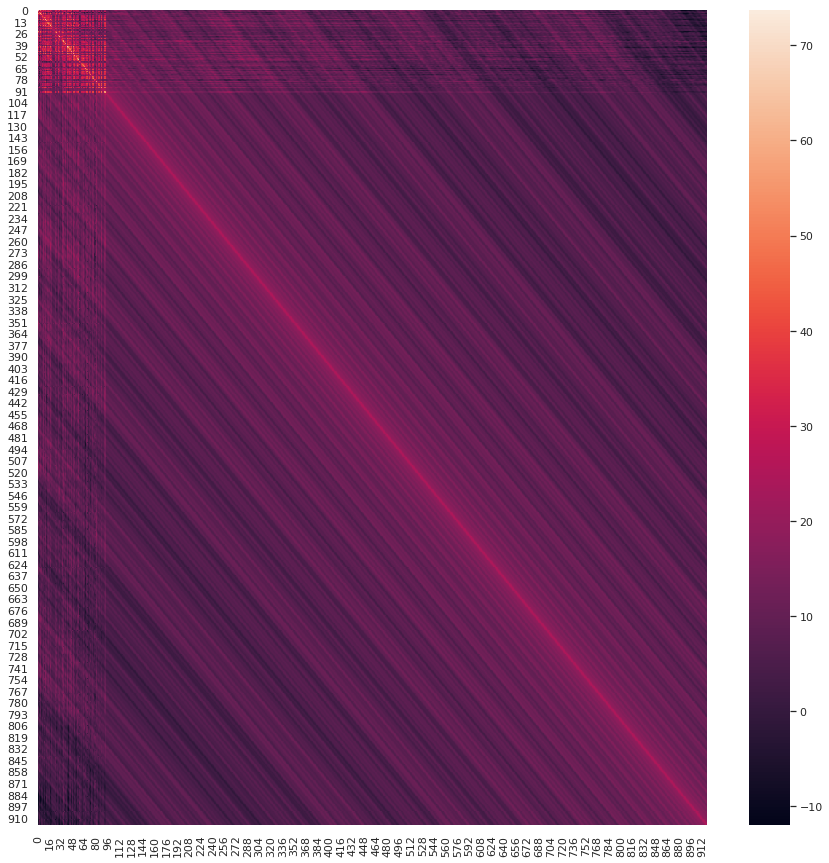

In [6]:
# /////////////////////////////////////////////////////////////////////////////////////// <positional encodings viz> ////

pe = PositionalEncoding(d_model=50,max_len=2000).to(device)
x = pe(batch[0].transpose(0,1).to(device))
pe0 = x[0]
dot = pe0 @ pe0.T
plt.figure(figsize=(15,15))
sns.heatmap(dot.cpu())

# ////////////////////////////////////////////////////////////////////////////////////// </positional encodings viz> ////

### Entraînement des modèles 

On note cette fois la nécessité d'avoir un *learning rate* faible pour la réussite de l'apprentissage, surtout dans le cas de CLS (il a fallu un fine-tuning conséquent, quoique le code ait été *juste depuis le départ*).

In [4]:
trainAttention(lr=0.001)


///////////////////////////// Self-attention classifier ////////////////////////////




LOSS: 		train 0.6852647662162781 		test 0.6380376815795898

ACCURACY: 		train 0.5249279769526248 		test 0.6407650448143406

LOSS: 		train 0.6094874739646912 		test 0.5960623025894165

ACCURACY: 		train 0.6794574263764405 		test 0.6963428297055058

LOSS: 		train 0.578087329864502 		test 0.5804957747459412

ACCURACY: 		train 0.7149487836107554 		test 0.710907490396927

LOSS: 		train 0.5642163157463074 		test 0.5639971494674683

ACCURACY: 		train 0.7321943021766966 		test 0.7288332266325224

LOSS: 		train 0.554511308670044 		test 0.5555889010429382

ACCURACY: 		train 0.739316581306018 		test 0.7414772727272727

LOSS: 		train 0.5514704585075378 		test 0.5538067817687988

ACCURACY: 		train 0.745758642765685 		test 0.7468389884763125

LOSS: 		train 0.5446572303771973 		test 0.5493941307067871

ACCURACY: 		train 0.7503601152368758 		test 0.7498399487836107

LOSS: 		train 0.5438910722732544 		test 0.574684202671051

ACCURACY: 		train 0.7546414852752881 		test 0.7270726632522407

LOSS: 		train

In [6]:
trainAttention(model=SelfAttentionPE,lr=0.001)


//////////////////////////// Adding positional encodings ///////////////////////////




LOSS: 		train 0.6785036325454712 		test 0.6294589042663574

ACCURACY: 		train 0.5424135723431498 		test 0.6533690781049936

LOSS: 		train 0.6000627875328064 		test 0.5963985919952393

ACCURACY: 		train 0.6874599871959027 		test 0.6935819462227913

LOSS: 		train 0.578883707523346 		test 0.5807339549064636

ACCURACY: 		train 0.7129081306017926 		test 0.7107074263764405

LOSS: 		train 0.5729680061340332 		test 0.5849515795707703

ACCURACY: 		train 0.7213908450704225 		test 0.7058258642765685

LOSS: 		train 0.5665362477302551 		test 0.5678161978721619

ACCURACY: 		train 0.7277128681177977 		test 0.7282730473751601

LOSS: 		train 0.5581767559051514 		test 0.5628159046173096

ACCURACY: 		train 0.7364356594110115 		test 0.732514404609475

LOSS: 		train 0.5449692606925964 		test 0.5451425909996033

ACCURACY: 		train 0.7550416133162612 		test 0.7522007042253521

LOSS: 		train 0.5381859540939331 		test 0.5440940260887146

ACCURACY: 		train 0.7593229833546735 		test 0.7539612676056338

LOSS: 		t

In [8]:
trainAttention(model=SelfAttentionCLS,lr=1e-4)


///////////////////////////// CLS-token classification /////////////////////////////




LOSS: 		train 0.6932076811790466 		test 0.6931546926498413

ACCURACY: 		train 0.4968389884763124 		test 0.5000400128040973

LOSS: 		train 0.6931490302085876 		test 0.6927351355552673

ACCURACY: 		train 0.5004401408450704 		test 0.5389724711907811

LOSS: 		train 0.6517056822776794 		test 0.6312835216522217

ACCURACY: 		train 0.6381642125480154 		test 0.6506882202304738

LOSS: 		train 0.6226903796195984 		test 0.6212505102157593

ACCURACY: 		train 0.6656530089628682 		test 0.6647327144686299

LOSS: 		train 0.6128838062286377 		test 0.6119073033332825

ACCURACY: 		train 0.6772967349551856 		test 0.6775368117797695

LOSS: 		train 0.6014419794082642 		test 0.6006158590316772

ACCURACY: 		train 0.6897007042253521 		test 0.6910211267605634

LOSS: 		train 0.593485414981842 		test 0.590876042842865

ACCURACY: 		train 0.6990637003841229 		test 0.7028249039692702

LOSS: 		train 0.5851404070854187 		test 0.5858554244041443

ACCURACY: 		train 0.7096670934699104 		test 0.7069062099871959

LOSS: 		t

In [ ]:
trainAttention(model=SelfAttentionPE_CLS,lr=1e-4)


////////////////////////// CLS with positional encodings ///////////////////////////




LOSS: 		train 0.693662166595459 		test 0.6937911510467529

ACCURACY: 		train 0.5044014084507042 		test 0.4945582586427657

LOSS: 		train 0.69388347864151 		test 0.6924620866775513

ACCURACY: 		train 0.5043613956466069 		test 0.5092429577464789

LOSS: 		train 0.6936283707618713 		test 0.6932256817817688

ACCURACY: 		train 0.507082266325224 		test 0.501800576184379

LOSS: 		train 0.6936755776405334 		test 0.6924571394920349

ACCURACY: 		train 0.5064420614596671 		test 0.5176056338028169

LOSS: 		train 0.6933155655860901 		test 0.6931147575378418

ACCURACY: 		train 0.5075224071702945 		test 0.49703905249679897

LOSS: 		train 0.6925004124641418 		test 0.6925857663154602

ACCURACY: 		train 0.5071622919334187 		test 0.5067221510883483

LOSS: 		train 0.6927496790885925 		test 0.6923882365226746

ACCURACY: 		train 0.506562099871959 		test 0.5338908450704225

LOSS: 		train 0.6930818557739258 		test 0.6927199363708496

ACCURACY: 		train 0.5054817541613317 		test 0.5052416773367477


In [1]:
%load_ext tensorboard

In [2]:
%tensorboard --logdir=runs